# **Introduction to Computer Vision - Assignment**

---
---
This is an assignment notebook for computer vision as part of the Fundamentals of Artificial Intelligence Programme. The objective of the assignment is to

*   Apply convolutional neural networks (CNN) to custom data for classification task  
*   Analyse the output of the pre-trained model
*   Adjust the test data to the training data
*   Adjust the CNN architecture to improve the accuracy   
*   Re-train a simple CNN model on the MNIST dataset

## **Instructions**
* Explore the tutorial notebook before doing the assignment. You need to reuse the codes explained in the tutorial, for your assignment.   
* Insert code cells you need, in this notebook and execute them to see the results.
* Create text cells to explain each step in the assignment.
* Print the notebook as a pdf file and save it with your group id/name for the submission as "FAIP_computervision_assignment_groupid".


 # **Assignment**
 ---
  

1.  Take a pen and paper and write 10 digits on the paper (try to write carelessly!).
2.  Take a photo of the written digits separately to create MNIST-like data samples.
3.  Upload the 10-digit images into your google drive or publicly available storage space.
4. Use our trained MNIST model (from the tutorial) to predict your handwritten digits.
5. Calculate the accuracy of the model on your 10 samples.
6. Are the accuracy comparable with the validation accuracy on the MNIST test set?
7. Re-train the model with more epochs
8. Recalculate the accuracy of your generated data. Does it make a difference?
9. Add another convolutional layer before the fully connected layer and retrain the model.
10. repeat step 8

## **Tips**:
- The model is trained on images with values between 0 and 1, make sure to normalize your images to this range
- Try to preprocess your images so that they look similar to an MNIST image for better matching of test data to the training data



In [6]:
import torchvision
import torch.nn.functional as F
import torch.nn as nn

# Define a neural network model.
def create_model():
  # nn.Sequential takes multiple neural network modules and sequentially passes 
  # the input through the modules.
  model = nn.Sequential(
              # MNIST image has dimension 28 x 28 (height x width)
              nn.Conv2d(1, 28, kernel_size=3, padding=1), # output: 28 x 28 x 28
              nn.ReLU(),
              
              nn.Conv2d(28, 32, kernel_size=3, stride=1, padding=1), # output: 32 x 28 x 28
              nn.ReLU(),
              nn.MaxPool2d(2, 2), # output: 32 x 14 x 14
              nn.BatchNorm2d(32),
              
              nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # output: 64 x 14 x 14
              nn.ReLU(),
              nn.MaxPool2d(2, 2), # output: 64 x 7 x 7
              nn.BatchNorm2d(64),

              nn.Flatten(), # Flattens the 64 x 7 x 7 tensor into a one dimensional array of length 64*7*7

              nn.Linear(64*7*7, 10) # output: one dimensional array of size 10
          )
  
  return model

In [1]:
# Import MNIST
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Download and Save MNIST 
data_train = MNIST('~/mnist_data', train=True, download=True, transform=ToTensor())
data_test = MNIST('~/mnist_data', train=False, download=True, transform=ToTensor())

# Print Data
print(data_train)

d:\Anaconda\envs\tf_torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\20123/mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [3]:
from torch.utils.data import DataLoader
import torch
from torchvision import transforms

# DataLoaders allow you to iterate through the data in randomized batches.
loaders = {
    'train' : torch.utils.data.DataLoader(data_train, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(data_test, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}

loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1cfb51ad6c8>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1cfb51ad748>}

In [4]:
example_batch = None

# A batch from the dataloader consists of a tensor of 100 images, and 
# a tensor of 100 labels
for images, labels in loaders["train"]:
  print(images.shape, labels.shape)

  example_batch = images, labels

  break

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [7]:
# Initialize the model
model = create_model()

In [8]:
import torch.optim as optim

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
# model.parameters() are the weights that should be updated during training
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [9]:
# Setup tensorboard to log training results
from torch.utils.tensorboard import SummaryWriter

# Change the comment to something else to identify the run in tensorboard
writer = SummaryWriter(comment="mnist_run")

# Adds a graph of the model to tensorboard.
# In the graph tab you can see the computional graph of the model.
writer.add_graph(model, example_batch[0])

writer.flush()

In [10]:
import torch
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# device = "cpu"

device

device(type='cuda', index=0)

In [11]:
# Move the model to the GPU to train faster
# If you get an error, choose gpu as hardware accelerator under Runtime -> Change runtime type
# model.cuda()
model.to(device)

Sequential(
  (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(28, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=3136, out_features=10, bias=True)
)

In [57]:
# The number of epochs to train for.
# During each epoch, the model is trained on all of the training data
num_epoch = 5

for epoch in range(1, num_epoch+1):
  train_loss=0.0
  valid_loss=0.0

  train_correct = 0
  valid_correct = 0

  # Set the model to train mode
  model.train()

  # Go through all the mini-batches in the train loader
  for img, lbl in loaders['train']:

    # Put the data on the gpu
    img=img.to(device)
    lbl=lbl.to(device)

    # Set the accumaleted gradients to zero
    optimizer.zero_grad()

    # Get the output of the model
    predict = model(img)
    
    # Compute the loss
    loss=loss_fn(predict,lbl)
    
    # Compute the gradients and update the weigths
    loss.backward()
    optimizer.step()
    
    # Update the cumulative train loss of this epoch
    train_loss += loss.item() * img.size(0)

    # Compute accuracy
    predicted_labels = predict.argmax(dim=1)

    train_correct += torch.sum(predicted_labels == lbl)


  # Evaluate the model on the test data
  model.eval()
  for img,lbl in loaders['test']:
    img=img.to(device)
    lbl=lbl.to(device)

    predict=model(img)
    loss=loss_fn(predict,lbl)

    # Update the test loss for this epoch
    valid_loss+=loss.item()*img.size(0)

    # Compute accuracy
    predicted_labels = predict.argmax(dim=1)

    valid_correct += torch.sum(predicted_labels == lbl)
  
  # Compute the loss and accuracy metrics for this epoch
  train_loss=train_loss/len(loaders['train'].sampler) 
  valid_loss=valid_loss/len(loaders['test'].sampler)

  train_acc = train_correct / len(loaders['train'].sampler) 
  valid_acc = valid_correct / len(loaders['test'].sampler)

  print('Epoch:{} Train Loss:{:.4f} valid Loss:{:.4f}; train Acc:{:.4f} valid Acc:{:.4f}'.format(epoch,train_loss,valid_loss, train_acc, valid_acc))

  # Log results to tensorboard
  writer.add_scalar('Loss/train', train_loss, epoch)
  writer.add_scalar('Loss/test', valid_loss, epoch)

  writer.add_scalar('Accuracy/train', train_acc, epoch)
  writer.add_scalar('Accuracy/test', valid_acc, epoch)

  writer.flush()

Epoch:1 Train Loss:0.0103 valid Loss:0.0271; train Acc:0.9982 valid Acc:0.9914
Epoch:2 Train Loss:0.0095 valid Loss:0.0270; train Acc:0.9987 valid Acc:0.9914
Epoch:3 Train Loss:0.0088 valid Loss:0.0261; train Acc:0.9988 valid Acc:0.9913
Epoch:4 Train Loss:0.0081 valid Loss:0.0260; train Acc:0.9991 valid Acc:0.9910
Epoch:5 Train Loss:0.0075 valid Loss:0.0267; train Acc:0.9991 valid Acc:0.9911


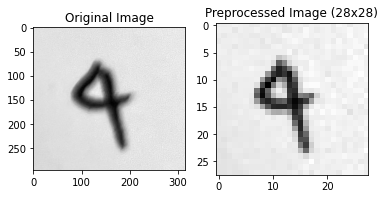

In [58]:
import cv2
import matplotlib.pyplot as plt

# List of image paths for your 10 handwritten digit images
image_paths = [f"IMG-20241017-WA000{i}.jpg" for i in range(1,11)]
# image_paths = [f'/Users/penglee/Desktop/FAIP/CVassignment/{i}.jpeg' for i in range(10)]

# Function to load and preprocess each image
def preprocess_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None

    # Resize the image to 28x28 pixels (same as MNIST)
    img_resized = cv2.resize(img, (28, 28))
    # Normalize pixel values to [0, 1] range
    img_normalized = img_resized / 255.0
    # Reshape the image to match the input shape expected by the model: (1, 28, 28, 1)
    img_reshaped = img_normalized.reshape(1, 28, 28, 1)
    return img_reshaped

# Loop through the image paths, load, preprocess, and display each one
for image_path in image_paths:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # If preprocessing failed, skip to the next image
    if preprocessed_image is None:
        continue

    # Display the original image
    img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Display the original and preprocessed images
    plt.subplot(1, 2, 1)
    plt.imshow(img_original, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')  # Display the preprocessed image
    plt.title('Preprocessed Image (28x28)')

    # plt.show()

#label
preprocessed_labels = [3,0,8,2,8,0,6,2,0,4]  # These are the true digit labels for each image

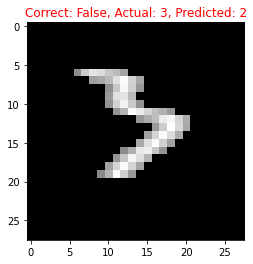

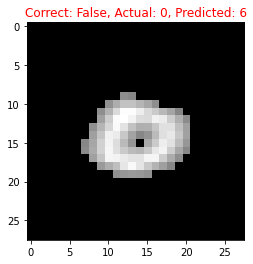

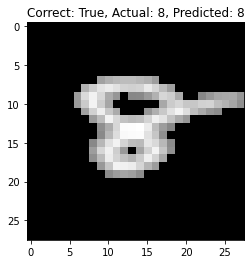

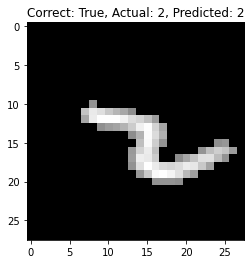

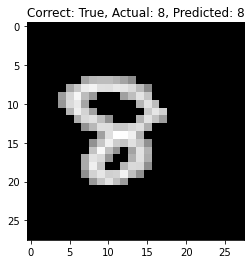

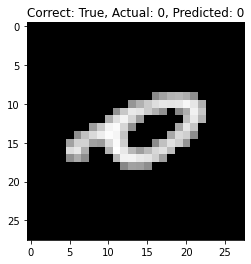

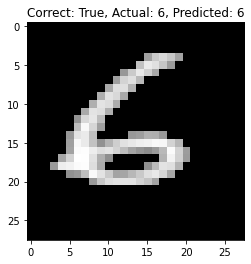

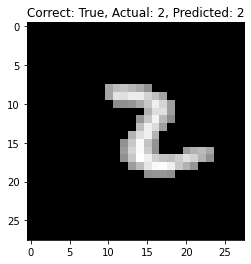

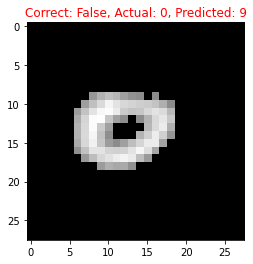

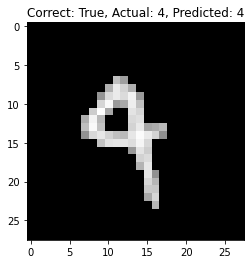

Correct Predictions: 7/10


In [56]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Set the model to evaluation mode
model.eval()

# Counter for correct predictions
correct = 0

# Define the list of custom image paths
image_paths = [f"IMG-20241017-WA000{i}.jpg" for i in range(1, 11)]
preprocessed_images = []

# Preprocess image function
def preprocess_image(image_path):
    # Load image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image {image_path}")
        return None

    # Resize the image to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert the colors (white background to black background)
    img = 255 - img

    # Normalize pixel values to range 0-1
    img = img.astype(np.float32) / 255.0

    # Set all values below 0.5 to 0
    img[img < 0.5] = 0

    return img

# Loop through each image, preprocess, and predict
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)

    if img is None:
        continue

    preprocessed_images.append(img)
    label = preprocessed_labels[i]  # Corresponding label

    # Reshape image to (1, 1, 28, 28) to match input dimensions
    img = img.reshape(1, 1, 28, 28)

    # Convert image to a PyTorch tensor and move to the correct device
    input = torch.tensor(img, dtype=torch.float32).to(device)

    # Perform inference without computing gradients
    with torch.no_grad():
        prediction = model(input)
        predicted_label = prediction.argmax(dim=1).item()

    # Check if prediction is correct
    is_correct = (label == predicted_label)
    correct += is_correct

    # Display the image and prediction result
    plt.figure()
    plt.title(f"Correct: {is_correct}, Actual: {label}, Predicted: {predicted_label}",
              color="black" if is_correct else "red")
    plt.imshow(img.squeeze(0).squeeze(0), cmap="gray")
    plt.show()

# Print the total number of correct predictions
print(f"Correct Predictions: {correct}/10")


In [55]:
# img.shape
# plt.imshow(img,cmap='gray')
import numpy as np
# np.array(input.cpu())
np.max(img)
# count the nu
img

array([[[[0.30588236, 0.30980393, 0.30588236, 0.29411766, 0.3019608 ,
          0.30588236, 0.31764707, 0.3137255 , 0.3019608 , 0.30980393,
          0.30980393, 0.30980393, 0.32941177, 0.30980393, 0.29803923,
          0.3019608 , 0.3137255 , 0.29803923, 0.30588236, 0.2901961 ,
          0.2901961 , 0.3137255 , 0.28235295, 0.2901961 , 0.31764707,
          0.29411766, 0.2901961 , 0.28627452],
         [0.29803923, 0.3019608 , 0.3019608 , 0.3254902 , 0.3019608 ,
          0.30980393, 0.30588236, 0.29411766, 0.30980393, 0.3137255 ,
          0.29411766, 0.3019608 , 0.3254902 , 0.32156864, 0.3019608 ,
          0.3137255 , 0.2784314 , 0.29803923, 0.3137255 , 0.3019608 ,
          0.29411766, 0.3137255 , 0.29803923, 0.2901961 , 0.2784314 ,
          0.29803923, 0.2901961 , 0.28627452],
         [0.30588236, 0.32156864, 0.30980393, 0.30588236, 0.3137255 ,
          0.30980393, 0.31764707, 0.31764707, 0.30980393, 0.30980393,
          0.31764707, 0.30588236, 0.28235295, 0.28627452, 0.298039

Epoch:1 Train Loss:0.0070 valid Loss:0.0256; train Acc:0.9993 valid Acc:0.9914
Epoch:2 Train Loss:0.0065 valid Loss:0.0262; train Acc:0.9994 valid Acc:0.9907
Epoch:3 Train Loss:0.0061 valid Loss:0.0266; train Acc:0.9994 valid Acc:0.9914
Epoch:4 Train Loss:0.0056 valid Loss:0.0256; train Acc:0.9996 valid Acc:0.9918
Epoch:5 Train Loss:0.0053 valid Loss:0.0259; train Acc:0.9997 valid Acc:0.9912
Epoch:6 Train Loss:0.0050 valid Loss:0.0254; train Acc:0.9998 valid Acc:0.9919
Epoch:7 Train Loss:0.0048 valid Loss:0.0252; train Acc:0.9998 valid Acc:0.9916
Epoch:8 Train Loss:0.0045 valid Loss:0.0258; train Acc:0.9998 valid Acc:0.9912
Epoch:9 Train Loss:0.0042 valid Loss:0.0255; train Acc:0.9999 valid Acc:0.9915
Epoch:10 Train Loss:0.0040 valid Loss:0.0254; train Acc:0.9999 valid Acc:0.9920
Epoch:11 Train Loss:0.0038 valid Loss:0.0254; train Acc:0.9999 valid Acc:0.9918
Epoch:12 Train Loss:0.0036 valid Loss:0.0266; train Acc:0.9999 valid Acc:0.9912
Epoch:13 Train Loss:0.0035 valid Loss:0.0250; tra

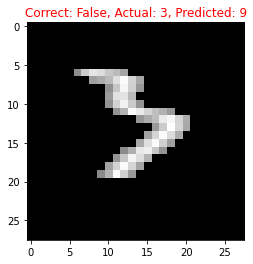

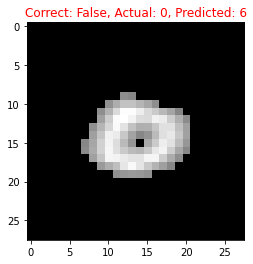

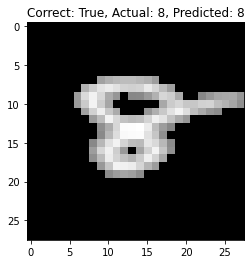

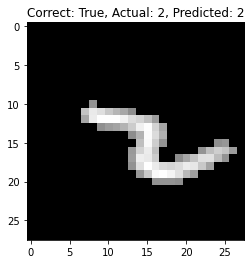

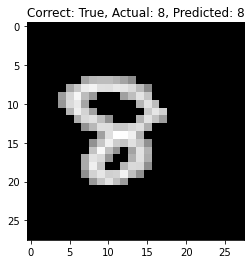

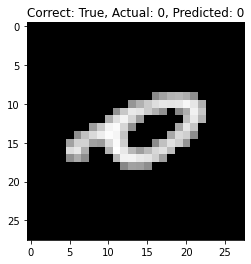

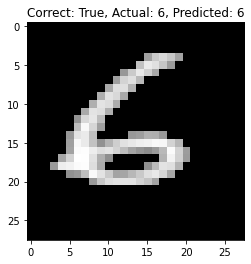

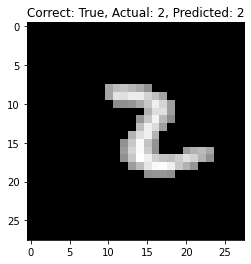

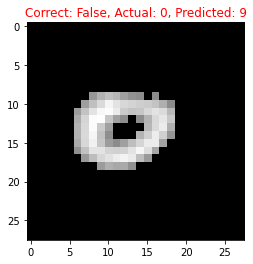

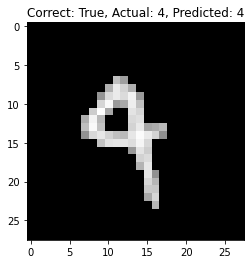

Correct Predictions: 7/10


In [59]:
# The number of epochs to train for.
# During each epoch, the model is trained on all of the training data
num_epoch = 15

for epoch in range(1, num_epoch+1):
  train_loss=0.0
  valid_loss=0.0

  train_correct = 0
  valid_correct = 0

  # Set the model to train mode
  model.train()

  # Go through all the mini-batches in the train loader
  for img, lbl in loaders['train']:

    # Put the data on the gpu
    img=img.to(device)
    lbl=lbl.to(device)

    # Set the accumaleted gradients to zero
    optimizer.zero_grad()

    # Get the output of the model
    predict = model(img)
    
    # Compute the loss
    loss=loss_fn(predict,lbl)
    
    # Compute the gradients and update the weigths
    loss.backward()
    optimizer.step()
    
    # Update the cumulative train loss of this epoch
    train_loss += loss.item() * img.size(0)

    # Compute accuracy
    predicted_labels = predict.argmax(dim=1)

    train_correct += torch.sum(predicted_labels == lbl)


  # Evaluate the model on the test data
  model.eval()
  for img,lbl in loaders['test']:
    img=img.to(device)
    lbl=lbl.to(device)

    predict=model(img)
    loss=loss_fn(predict,lbl)

    # Update the test loss for this epoch
    valid_loss+=loss.item()*img.size(0)

    # Compute accuracy
    predicted_labels = predict.argmax(dim=1)

    valid_correct += torch.sum(predicted_labels == lbl)
  
  # Compute the loss and accuracy metrics for this epoch
  train_loss=train_loss/len(loaders['train'].sampler) 
  valid_loss=valid_loss/len(loaders['test'].sampler)

  train_acc = train_correct / len(loaders['train'].sampler) 
  valid_acc = valid_correct / len(loaders['test'].sampler)

  print('Epoch:{} Train Loss:{:.4f} valid Loss:{:.4f}; train Acc:{:.4f} valid Acc:{:.4f}'.format(epoch,train_loss,valid_loss, train_acc, valid_acc))

  # Log results to tensorboard
  writer.add_scalar('Loss/train', train_loss, epoch)
  writer.add_scalar('Loss/test', valid_loss, epoch)

  writer.add_scalar('Accuracy/train', train_acc, epoch)
  writer.add_scalar('Accuracy/test', valid_acc, epoch)

  writer.flush()
  
  
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Set the model to evaluation mode
model.eval()

# Counter for correct predictions
correct = 0

# Define the list of custom image paths
image_paths = [f"IMG-20241017-WA000{i}.jpg" for i in range(1, 11)]
preprocessed_images = []

# Preprocess image function
def preprocess_image(image_path):
    # Load image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image {image_path}")
        return None

    # Resize the image to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert the colors (white background to black background)
    img = 255 - img

    # Normalize pixel values to range 0-1
    img = img.astype(np.float32) / 255.0

    # Set all values below 0.5 to 0
    img[img < 0.5] = 0

    return img

# Loop through each image, preprocess, and predict
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)

    if img is None:
        continue

    preprocessed_images.append(img)
    label = preprocessed_labels[i]  # Corresponding label

    # Reshape image to (1, 1, 28, 28) to match input dimensions
    img = img.reshape(1, 1, 28, 28)

    # Convert image to a PyTorch tensor and move to the correct device
    input = torch.tensor(img, dtype=torch.float32).to(device)

    # Perform inference without computing gradients
    with torch.no_grad():
        prediction = model(input)
        predicted_label = prediction.argmax(dim=1).item()

    # Check if prediction is correct
    is_correct = (label == predicted_label)
    correct += is_correct

    # Display the image and prediction result
    plt.figure()
    plt.title(f"Correct: {is_correct}, Actual: {label}, Predicted: {predicted_label}",
              color="black" if is_correct else "red")
    plt.imshow(img.squeeze(0).squeeze(0), cmap="gray")
    plt.show()

# Print the total number of correct predictions
print(f"Correct Predictions: {correct}/10")


In [75]:
import torchvision
import torch.nn.functional as F
import torch.nn as nn

# Define a neural network model.
def create_model():
  # nn.Sequential takes multiple neural network modules and sequentially passes 
  # the input through the modules.
  model = nn.Sequential(
              # MNIST image has dimension 28 x 28 (height x width)
              nn.Conv2d(1, 28, kernel_size=3, padding=1), # output: 28 x 28 x 28
              nn.ReLU(),
              
              nn.Conv2d(28, 32, kernel_size=3, stride=1, padding=1), # output: 32 x 28 x 28
              nn.ReLU(),
              nn.MaxPool2d(2, 2), # output: 32 x 14 x 14
              nn.BatchNorm2d(32),
              
              nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # output: 64 x 14 x 14
              nn.ReLU(),
              nn.MaxPool2d(2, 2), # output: 64 x 7 x 7
              nn.BatchNorm2d(64),
              
              nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # output: 128 x 14 x 14
              nn.ReLU(),
              # nn.MaxPool2d(2, 2), # output: 256 x 3 x 3
              nn.BatchNorm2d(128),
              

              nn.Flatten(), # Flattens the 64 x 7 x 7 tensor into a one dimensional array of length 64*7*7

              nn.Linear(128*7*7, 10) # output: one dimensional array of size 10
          )
  
  return model

In [76]:
# Initialize the model
model = create_model()
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
# model.parameters() are the weights that should be updated during training
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Setup tensorboard to log training results
from torch.utils.tensorboard import SummaryWriter

# Change the comment to something else to identify the run in tensorboard
writer = SummaryWriter(comment="mnist_run")

# Adds a graph of the model to tensorboard.
# In the graph tab you can see the computional graph of the model.
writer.add_graph(model, example_batch[0])

writer.flush()

# device = "cpu"
model.to(device)






Sequential(
  (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(28, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=6272, out_features=10, bias=True)
)

Epoch:1 Train Loss:0.1278 valid Loss:0.0481; train Acc:0.9633 valid Acc:0.9858
Epoch:2 Train Loss:0.0407 valid Loss:0.0358; train Acc:0.9886 valid Acc:0.9889
Epoch:3 Train Loss:0.0290 valid Loss:0.0340; train Acc:0.9921 valid Acc:0.9892
Epoch:4 Train Loss:0.0222 valid Loss:0.0288; train Acc:0.9942 valid Acc:0.9903
Epoch:5 Train Loss:0.0173 valid Loss:0.0258; train Acc:0.9956 valid Acc:0.9923
Epoch:6 Train Loss:0.0143 valid Loss:0.0243; train Acc:0.9970 valid Acc:0.9918
Epoch:7 Train Loss:0.0116 valid Loss:0.0242; train Acc:0.9980 valid Acc:0.9918
Epoch:8 Train Loss:0.0095 valid Loss:0.0228; train Acc:0.9985 valid Acc:0.9928
Epoch:9 Train Loss:0.0081 valid Loss:0.0232; train Acc:0.9989 valid Acc:0.9925
Epoch:10 Train Loss:0.0069 valid Loss:0.0226; train Acc:0.9992 valid Acc:0.9931
Epoch:11 Train Loss:0.0059 valid Loss:0.0230; train Acc:0.9995 valid Acc:0.9924
Epoch:12 Train Loss:0.0052 valid Loss:0.0224; train Acc:0.9996 valid Acc:0.9925
Epoch:13 Train Loss:0.0046 valid Loss:0.0230; tra

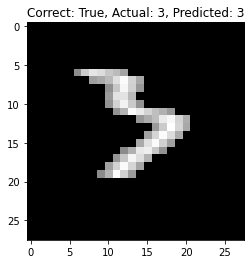

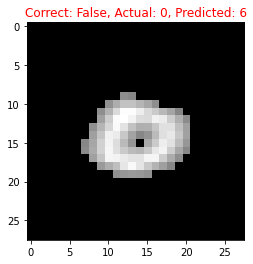

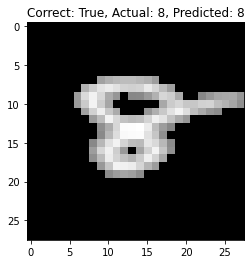

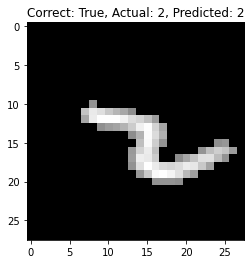

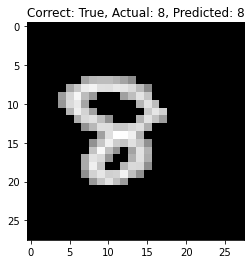

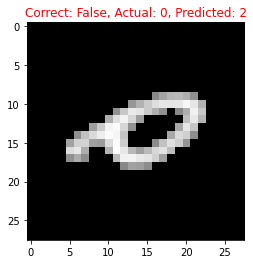

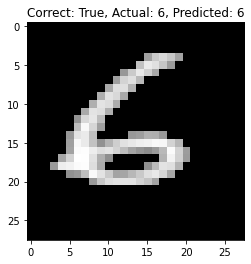

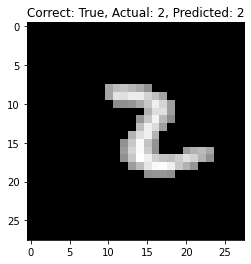

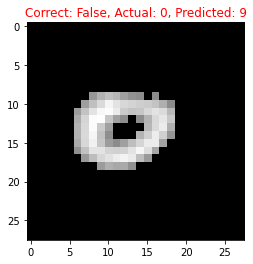

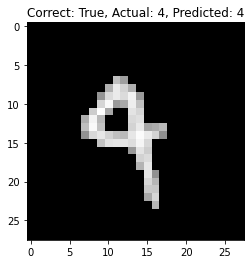

Correct Predictions: 7/10


In [77]:
# The number of epochs to train for.
# During each epoch, the model is trained on all of the training data
num_epoch = 15

for epoch in range(1, num_epoch+1):
  train_loss=0.0
  valid_loss=0.0

  train_correct = 0
  valid_correct = 0

  # Set the model to train mode
  model.train()

  # Go through all the mini-batches in the train loader
  for img, lbl in loaders['train']:

    # Put the data on the gpu
    img=img.to(device)
    lbl=lbl.to(device)

    # Set the accumaleted gradients to zero
    optimizer.zero_grad()

    # Get the output of the model
    predict = model(img)
    
    # Compute the loss
    loss=loss_fn(predict,lbl)
    
    # Compute the gradients and update the weigths
    loss.backward()
    optimizer.step()
    
    # Update the cumulative train loss of this epoch
    train_loss += loss.item() * img.size(0)

    # Compute accuracy
    predicted_labels = predict.argmax(dim=1)

    train_correct += torch.sum(predicted_labels == lbl)


  # Evaluate the model on the test data
  model.eval()
  for img,lbl in loaders['test']:
    img=img.to(device)
    lbl=lbl.to(device)

    predict=model(img)
    loss=loss_fn(predict,lbl)

    # Update the test loss for this epoch
    valid_loss+=loss.item()*img.size(0)

    # Compute accuracy
    predicted_labels = predict.argmax(dim=1)

    valid_correct += torch.sum(predicted_labels == lbl)
  
  # Compute the loss and accuracy metrics for this epoch
  train_loss=train_loss/len(loaders['train'].sampler) 
  valid_loss=valid_loss/len(loaders['test'].sampler)

  train_acc = train_correct / len(loaders['train'].sampler) 
  valid_acc = valid_correct / len(loaders['test'].sampler)

  print('Epoch:{} Train Loss:{:.4f} valid Loss:{:.4f}; train Acc:{:.4f} valid Acc:{:.4f}'.format(epoch,train_loss,valid_loss, train_acc, valid_acc))

  # Log results to tensorboard
  writer.add_scalar('Loss/train', train_loss, epoch)
  writer.add_scalar('Loss/test', valid_loss, epoch)

  writer.add_scalar('Accuracy/train', train_acc, epoch)
  writer.add_scalar('Accuracy/test', valid_acc, epoch)

  writer.flush()
  
  
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Set the model to evaluation mode
model.eval()

# Counter for correct predictions
correct = 0

# Define the list of custom image paths
image_paths = [f"IMG-20241017-WA000{i}.jpg" for i in range(1, 11)]
preprocessed_images = []

# Preprocess image function
def preprocess_image(image_path):
    # Load image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image {image_path}")
        return None

    # Resize the image to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert the colors (white background to black background)
    img = 255 - img

    # Normalize pixel values to range 0-1
    img = img.astype(np.float32) / 255.0

    # Set all values below 0.5 to 0
    img[img < 0.5] = 0

    return img

# Loop through each image, preprocess, and predict
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)

    if img is None:
        continue

    preprocessed_images.append(img)
    label = preprocessed_labels[i]  # Corresponding label

    # Reshape image to (1, 1, 28, 28) to match input dimensions
    img = img.reshape(1, 1, 28, 28)

    # Convert image to a PyTorch tensor and move to the correct device
    input = torch.tensor(img, dtype=torch.float32).to(device)

    # Perform inference without computing gradients
    with torch.no_grad():
        prediction = model(input)
        predicted_label = prediction.argmax(dim=1).item()

    # Check if prediction is correct
    is_correct = (label == predicted_label)
    correct += is_correct

    # Display the image and prediction result
    plt.figure()
    plt.title(f"Correct: {is_correct}, Actual: {label}, Predicted: {predicted_label}",
              color="black" if is_correct else "red")
    plt.imshow(img.squeeze(0).squeeze(0), cmap="gray")
    plt.show()

# Print the total number of correct predictions
print(f"Correct Predictions: {correct}/10")